In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from string import ascii_letters
import seaborn as sns

/Users/luvi/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [3]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

# Carregando dados

In [4]:
BREAST_CANCER_FILE = "data.csv"


def load_data(data=BREAST_CANCER_FILE):
    return pd.read_csv(data)


df = load_data()

# Dividindo os dados em conjunto de treinamento e de testes

In [5]:
from sklearn.model_selection import train_test_split
#limpando coluna vazia
df = df.drop(columns=["Unnamed: 32", "id"])
train_set, test_set = train_test_split(df, test_size=0.2, random_state=RANDOM_SEED)

# Entendendo inicialmente os dados

In [6]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455 entries, 68 to 102
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                455 non-null    object 
 1   radius_mean              455 non-null    float64
 2   texture_mean             455 non-null    float64
 3   perimeter_mean           455 non-null    float64
 4   area_mean                455 non-null    float64
 5   smoothness_mean          455 non-null    float64
 6   compactness_mean         455 non-null    float64
 7   concavity_mean           455 non-null    float64
 8   concave points_mean      455 non-null    float64
 9   symmetry_mean            455 non-null    float64
 10  fractal_dimension_mean   455 non-null    float64
 11  radius_se                455 non-null    float64
 12  texture_se               455 non-null    float64
 13  perimeter_se             455 non-null    float64
 14  area_se                  

# Separando variáveis independentes e dependentes, x e y

In [7]:
X_train = train_set.drop(columns=["diagnosis"])
y_train = train_set["diagnosis"].copy()

X_test = test_set.drop(columns=["diagnosis"])
y_test = test_set["diagnosis"].copy()

In [8]:
X_train.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
68         9.029         17.33           58.79      250.5          0.10660   
181       21.090         26.57          142.70     1311.0          0.11410   
63         9.173         13.86           59.20      260.9          0.07721   
248       10.650         25.22           68.01      347.0          0.09657   
60        10.170         14.88           64.55      311.9          0.11340   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
68            0.14130         0.31300              0.04375         0.2111   
181           0.28320         0.24870              0.14960         0.2395   
63            0.08751         0.05988              0.02180         0.2341   
248           0.07234         0.02379              0.01615         0.1897   
60            0.08061         0.01084              0.01290         0.2743   

     fractal_dimension_mean  ...  radius_worst  texture_worst  \
68                  0.08046  ...         10.31          22.65   
181                 0.07398  ...         26.68          33.48   
63                  0.06963  ...         10.01          19.23   
248                 0.06329  ...         12.25          35.19   
60                  0.06960  ...         11.02          17.45   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
68             65.50       324.7           0.14820            0.43650   
181           176.50      2089.0           0.14910            0.75840   
63             65.59       310.1           0.09836            0.16780   
248            77.98       455.7           0.14990            0.13980   
60             69.86       368.6           0.12750            0.09866   

     concavity_worst  concave points_worst  symmetry_worst  \
68           1.25200               0.17500          0.4228   
181          0.67800               0.29030          0.4098   
63           0.13970               0.05087          0.3282   
248          0.11250               0.06136          0.3409   
60           0.02168               0.02579          0.3557   

     fractal_dimension_worst  
68                   0.11750  
181                  0.12840  
63                   0.08490  
248                  0.08147  
60                   0.08020  

[5 rows x 30 columns]

In [9]:
y_class_count = dict(y_train.value_counts())

In [10]:
y_samples_sum = sum(y_class_count.values())
print("Ocorrência de Tumores Benignos: {0}".format(y_class_count['B']/y_samples_sum))
print("Ocorrência de Tumores Malignos: {0}".format(y_class_count['M']/y_samples_sum))

Ocorrência de Tumores Benignos: 0.6285714285714286
Ocorrência de Tumores Malignos: 0.37142857142857144


In [11]:
#transforma a variável dependente em dummy
y_train = np.where(y_train.str.contains("M"), 1, 0)

y_test = np.where(y_test.str.contains("M"), 1, 0)

# Análise preliminar das distribuições das variáveis e suas relações

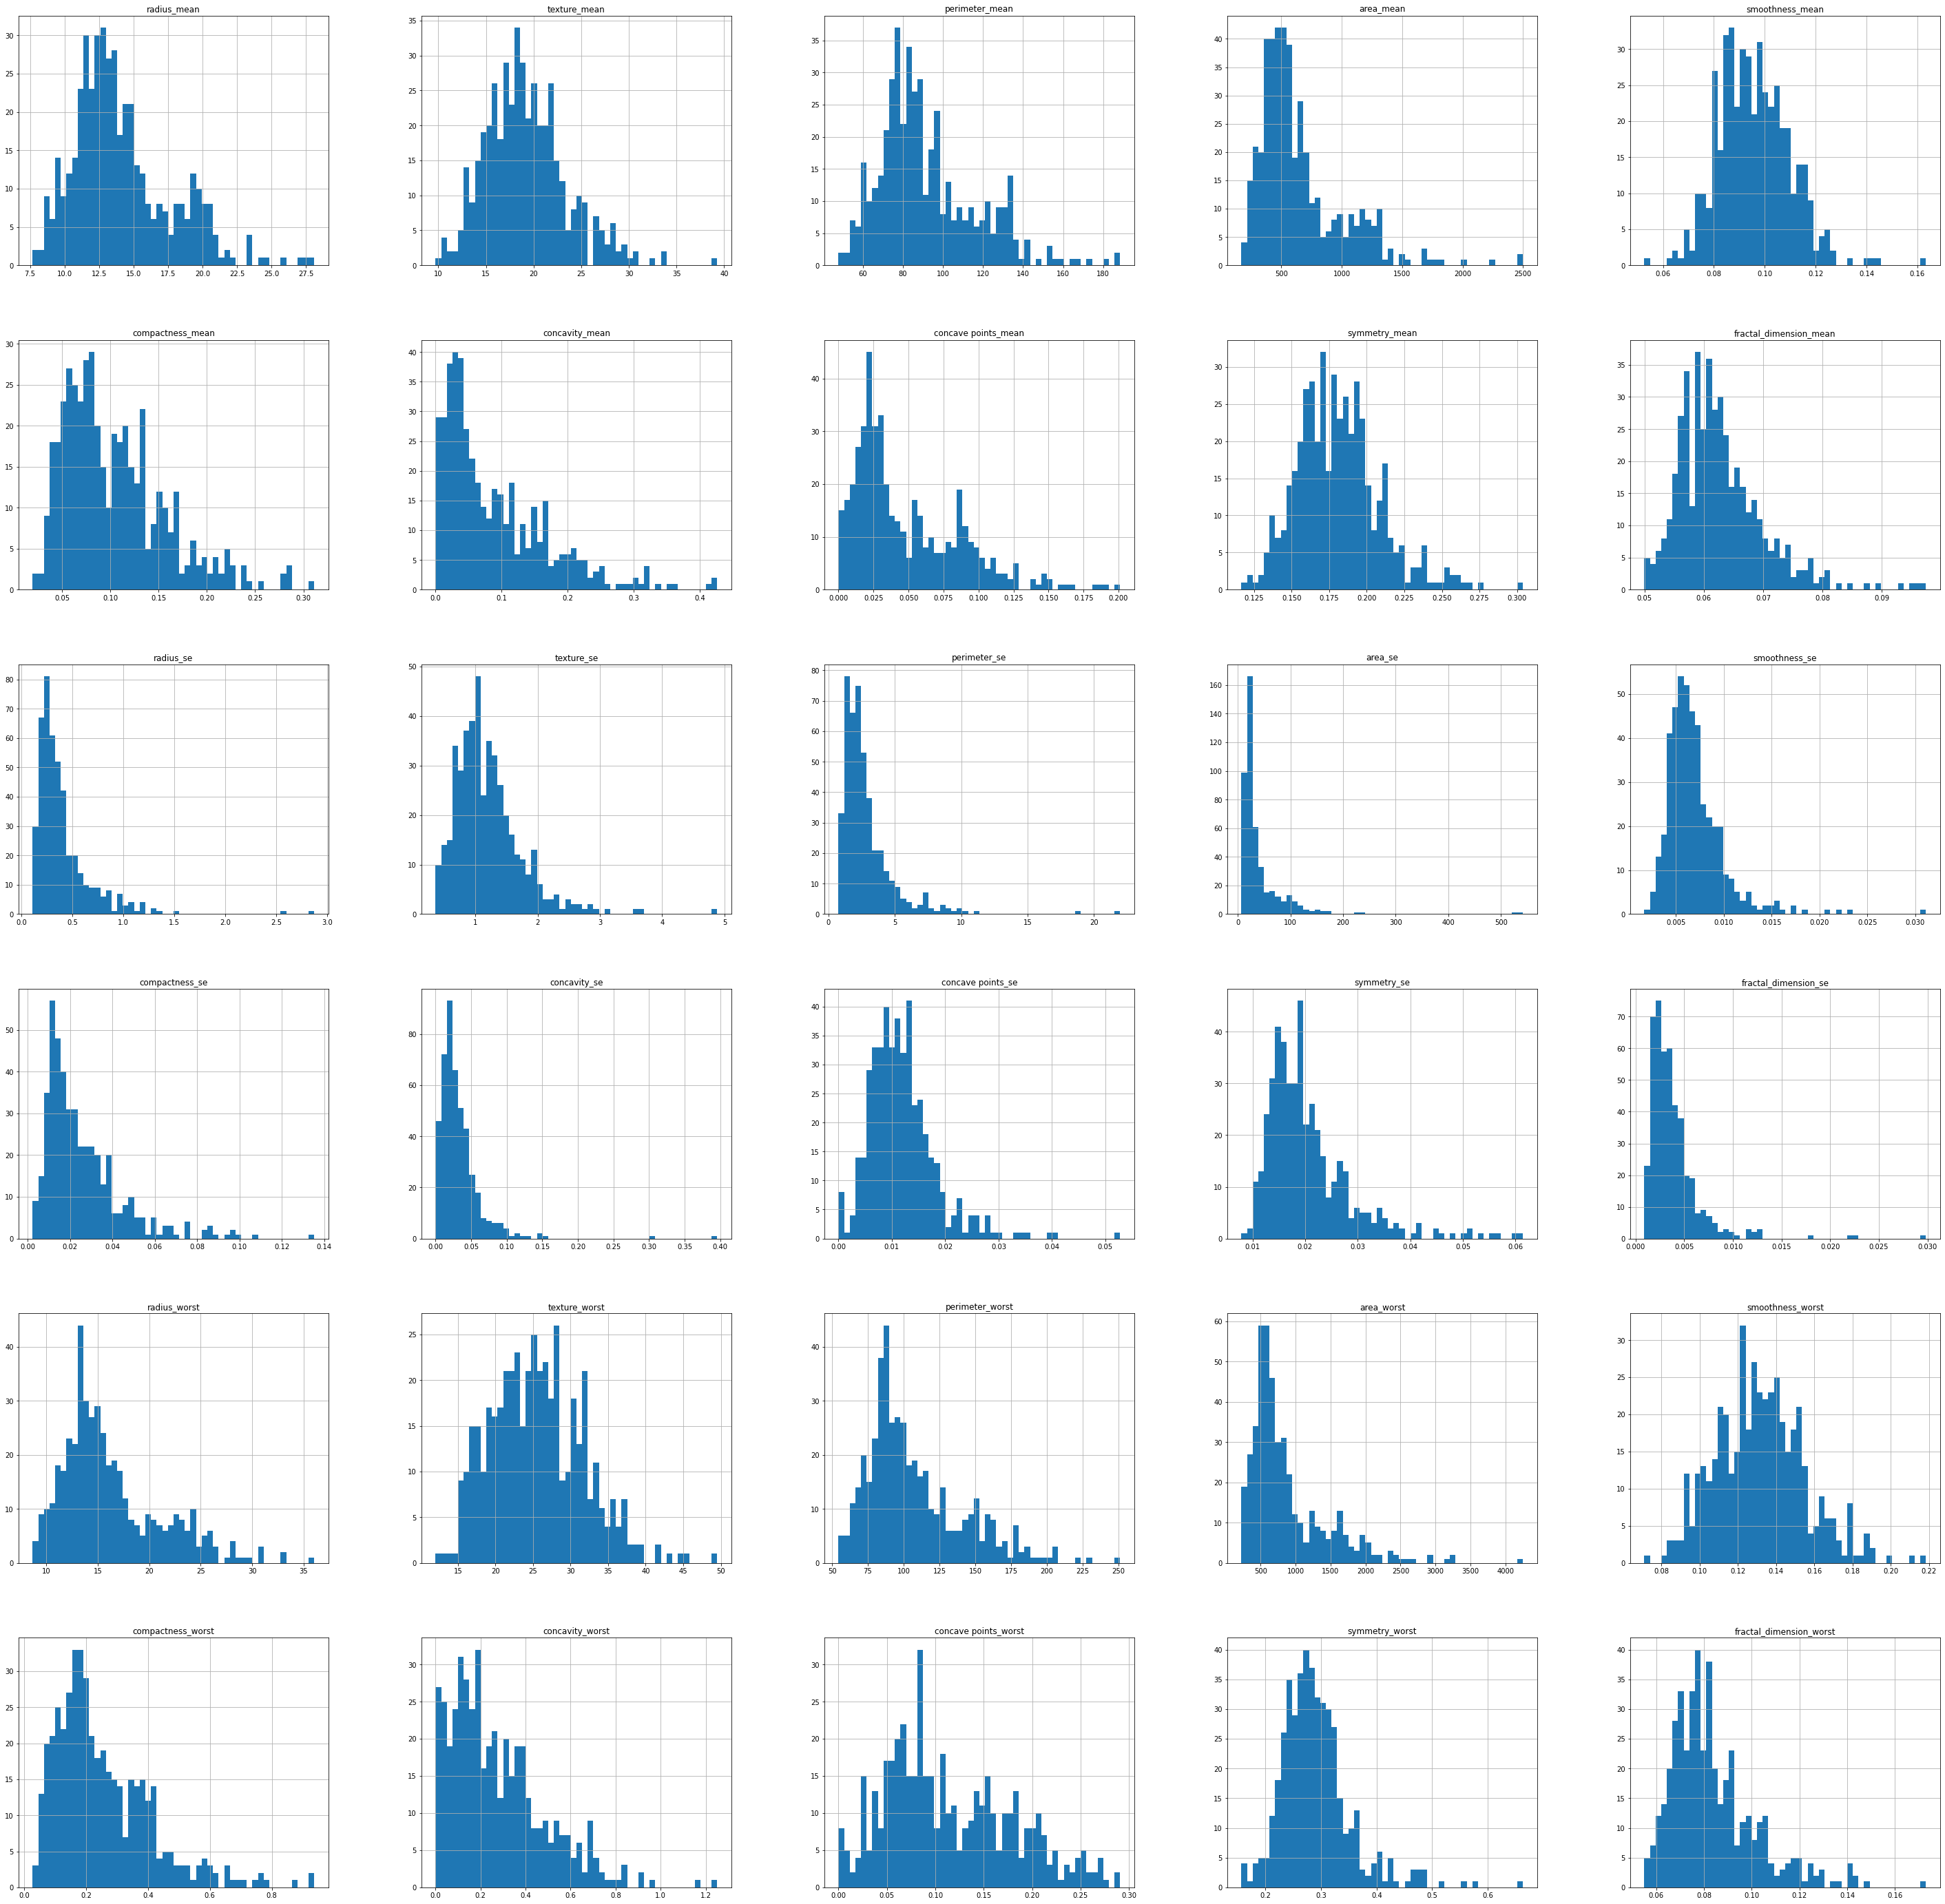

In [12]:
X_train.hist(bins=50, figsize=(50, 50))
plt.show()

In [13]:
cov_mat = X_train.corr()
sns.set(font_scale=5)
plt.figure(figsize=(200,200))
sns.set(font_scale=10)
hm = sns.heatmap(cov_mat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 100},
                 yticklabels=X_train.columns,
                 xticklabels=X_train.columns)

plt.title('Covariance matrix showing correlation coefficients', fontsize=16)
plt.tight_layout()
plt.show()

# Criação do modelo preditivo sem o PCA

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler


forest_clf = RandomForestClassifier(n_estimators=100, random_state=RANDOM_SEED)

y_probas_forest = cross_val_predict(forest_clf, StandardScaler().fit_transform(X_train), y_train, cv=3, method="predict_proba", n_jobs=-1)

# Gambiarra para desviar do bug #9589 introduzido no Scikit-Learn 0.19.0:
y_scores_forest = y_probas_forest[:, 1]  # score = prob. de ser da classe positiva
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train, y_scores_forest)

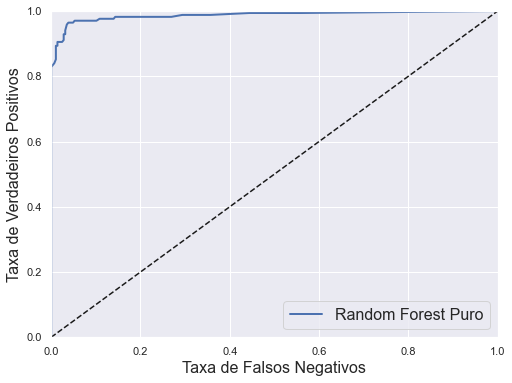

Área sob a curva: 0.9870174204493731


In [15]:

sns.set(font_scale=1)
plt.figure(figsize=(8, 6))
plt.plot(fpr_forest, tpr_forest, linewidth=2, label="Random Forest Puro")
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('Taxa de Falsos Negativos', fontsize=16)
plt.ylabel('Taxa de Verdadeiros Positivos', fontsize=16)
plt.legend(loc="lower right", fontsize=16)
plt.show()
print("Área sob a curva: {0}".format(auc(fpr_forest, tpr_forest)))

# Testando o modelo com uma threshold de 0.38

<Figure size 5760x5760 with 0 Axes>

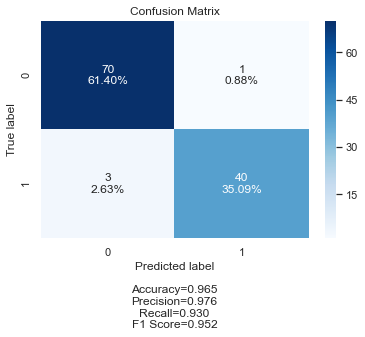

In [17]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

forest_clf.fit(StandardScaler().fit_transform(X_train), y_train)


#y_test_pred = cross_val_predict(forest_clf, StandardScaler().fit_transform(X_test), y_test, cv=3, n_jobs=-1)
y_test_pred = forest_clf.predict_proba(StandardScaler().fit_transform(X_test))
y_test_pred = (y_test_pred[:,1] >= 0.38).astype('int')

matrix = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(80, 80))

make_confusion_matrix(matrix)    
    
plt.title('Confusion Matrix')
#plt.tight_layout()
plt.show()

# Criação do modelo preditivo com o PCA

In [18]:
from sklearn.decomposition import PCA
pca = PCA(.95)
principalComponents = pca.fit_transform(StandardScaler().fit_transform(X_train))
principalDf = pd.DataFrame(data = principalComponents)
principalDf

0         1         2         3         4         5         6  \
0    4.244903  9.131428  1.504262 -0.650982  4.321306  1.684281 -1.999392   
1    9.053755  0.475310 -3.198215  0.704403  0.324461  0.648746  0.848774   
2   -2.275374  3.278471  2.816370 -0.268242 -0.582721  2.988050  0.138743   
3   -2.510453  0.743743 -0.736034  2.524633 -1.639580  0.088052  0.170851   
4   -2.302848  2.665155  1.192885 -1.268602 -3.516421  2.795426  0.538828   
..        ...       ...       ...       ...       ...       ...       ...   
450 -0.368252  7.231415  3.805657 -2.364698  1.804542 -1.775246  1.730576   
451 -0.686605  1.781220 -0.693044  0.586677 -1.091352 -1.557843 -0.331881   
452 -4.500654 -3.067808 -0.031045 -0.444543  1.429977  1.014813  0.070899   
453  0.728285  0.426287 -2.730932  0.529393  0.005962 -1.090005  0.115138   
454 -3.403925 -1.330388 -0.149210  1.804540  0.045595  0.240231 -0.080949   

            7         8         9  
0    0.328794  3.733334 -3.021001  
1   -0.243660 -1.070485  1.276224  
2   -0.489081 -0.498985  0.095752  
3    0.258152  0.578347  0.287879  
4   -0.752522  0.132848  1.389429  
..        ...       ...       ...  
450  1.812671 -1.877876  3.069933  
451 -0.607849  0.348577 -0.471461  
452  0.196234 -0.378339  0.315935  
453 -0.142244 -0.093700 -0.527183  
454 -0.581153  0.257406  0.086794  

[455 rows x 10 columns]

In [19]:
pca.singular_values_

array([77.05926087, 51.59215967, 36.54007835, 29.75558584, 26.77846228,
       23.69382089, 17.46877445, 14.99818237, 13.72505318, 12.82646813])

In [20]:
print('Variância por componente principal: {}'.format(pca.explained_variance_ratio_))

Variância por componente principal: [0.43502782 0.19500007 0.09781519 0.06486409 0.05253378 0.041128
 0.0223559  0.01647952 0.01380052 0.01205262]


In [21]:
sum(pca.explained_variance_ratio_)

0.9510575059327269

Text(0.5, 1.0, 'Componentes Principais por Variância')

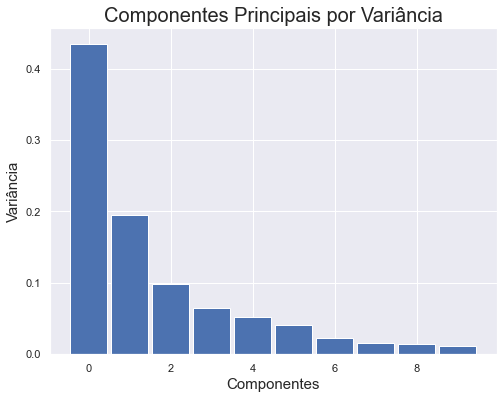

In [22]:
x = np.arange(10)
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(1,1,1) 
ax.bar(x, pca.explained_variance_ratio_, 0.9)

ax.set_xlabel('Componentes', fontsize = 15)
ax.set_ylabel('Variância', fontsize = 15)
ax.set_title('Componentes Principais por Variância', fontsize = 20)

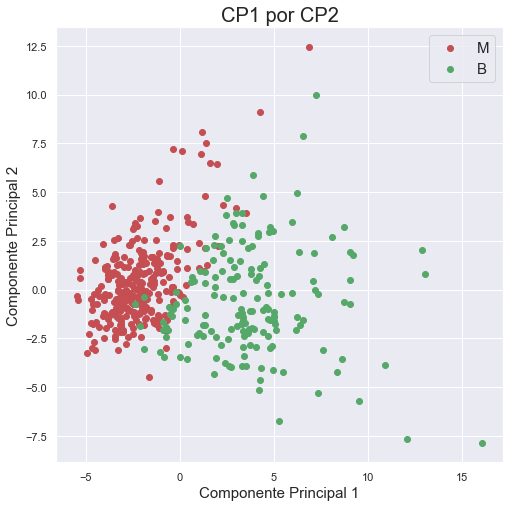

In [23]:
targets = [0, 1]
labels = ["M", "B"]

colors = ['r', 'g']
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Componente Principal 1', fontsize = 15)
ax.set_ylabel('Componente Principal 2', fontsize = 15)
ax.set_title('CP1 por CP2', fontsize = 20)

for target, color in zip(targets,colors):
    indicesToKeep = y_train == target
    ax.scatter((principalDf.loc[indicesToKeep, 0])
               , (principalDf.loc[indicesToKeep, 1]), c = color)
ax.legend(labels, prop={'size': 15})

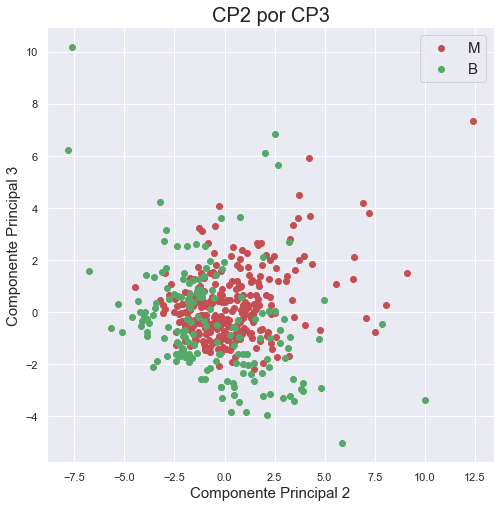

In [24]:
targets = [0, 1]
labels = ["M", "B"]

colors = ['r', 'g']
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Componente Principal 2', fontsize = 15)
ax.set_ylabel('Componente Principal 3', fontsize = 15)
ax.set_title('CP2 por CP3', fontsize = 20)

for target, color in zip(targets,colors):
    indicesToKeep = y_train == target
    ax.scatter((principalDf.loc[indicesToKeep, 1])
               , (principalDf.loc[indicesToKeep, 2]), c = color)
ax.legend(labels, prop={'size': 15})

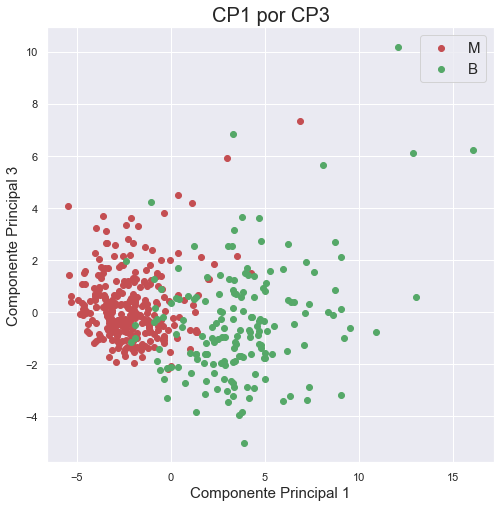

In [25]:
targets = [0, 1]
labels = ["M", "B"]

colors = ['r', 'g']
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Componente Principal 1', fontsize = 15)
ax.set_ylabel('Componente Principal 3', fontsize = 15)
ax.set_title('CP1 por CP3', fontsize = 20)

for target, color in zip(targets,colors):
    indicesToKeep = y_train == target
    ax.scatter((principalDf.loc[indicesToKeep, 0])
               , (principalDf.loc[indicesToKeep, 2]), c = color)
ax.legend(labels, prop={'size': 15})

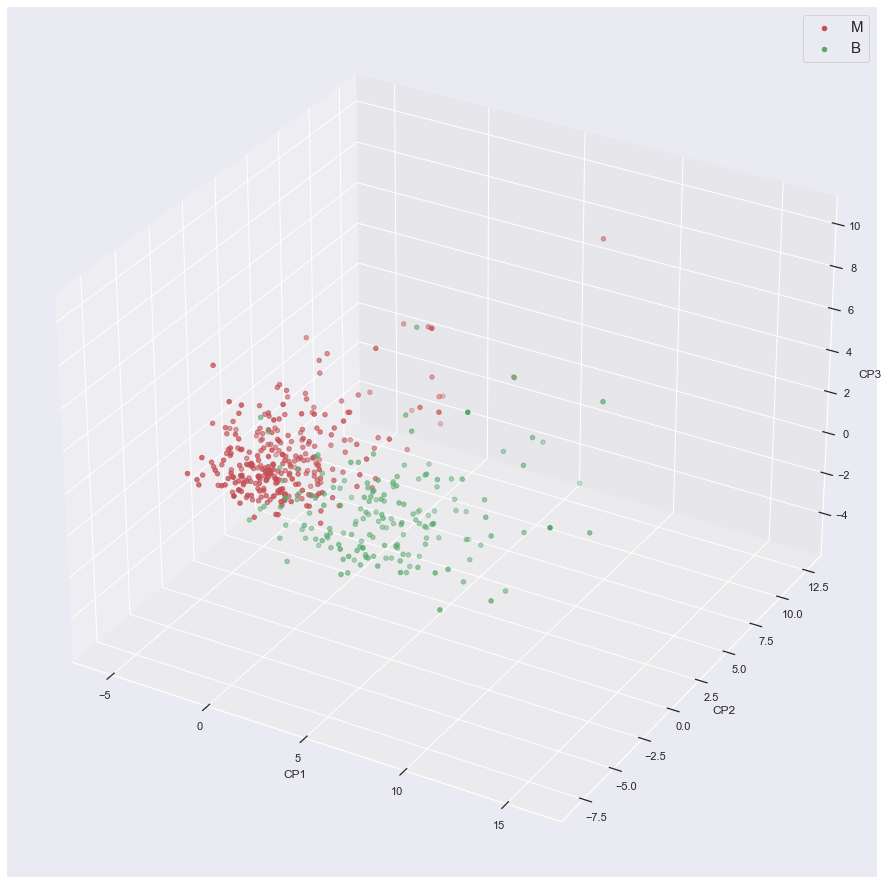

In [26]:
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

sns.set(style = "darkgrid")

fig = plt.figure(figsize = (16,16))
ax = fig.add_subplot(111, projection = '3d')

x = principalDf[0]
y = principalDf[1]
z = principalDf[2]

ax.set_xlabel("CP1")
ax.set_ylabel("CP2")
ax.set_zlabel("CP3")

#ax.scatter(x, y, z)

colors = ['r', 'g']


for target, color in zip(targets,colors):
    indicesToKeep = y_train == target
    ax.scatter((principalDf.loc[indicesToKeep, 0]),
               (principalDf.loc[indicesToKeep, 1]),
               (principalDf.loc[indicesToKeep, 2]), c = color)
ax.legend(labels, prop={'size': 15})
plt.show()


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, auc


forest_clf_pca = RandomForestClassifier(n_estimators=100, random_state=42)

y_probas_forest = cross_val_predict(forest_clf_pca, principalDf, y_train, cv=3, method="predict_proba", n_jobs=-1)

# Gambiarra para desviar do bug #9589 introduzido no Scikit-Learn 0.19.0:
y_scores_forest = y_probas_forest[:, 1]  # score = prob. de ser da classe positiva

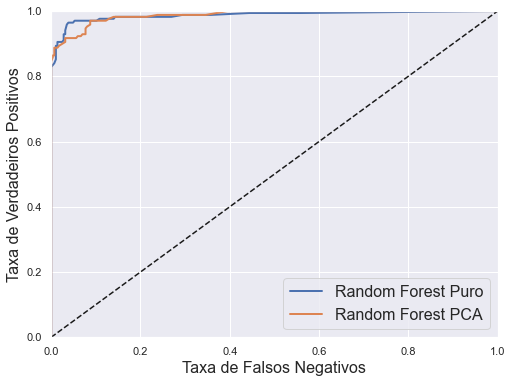

Random Forest: 0.9870174204493731
Random Forest PCA: 0.9876691355981297


In [28]:
fpr_forest_pca, tpr_forest_pca, thresholds_forest_pca = roc_curve(y_train, y_scores_forest)

sns.set(font_scale=1)
plt.figure(figsize=(8, 6))
plt.plot(fpr_forest, tpr_forest, linewidth=2, label="Random Forest Puro")
plt.plot(fpr_forest_pca, tpr_forest_pca, linewidth=2, label="Random Forest PCA")


plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('Taxa de Falsos Negativos', fontsize=16)
plt.ylabel('Taxa de Verdadeiros Positivos', fontsize=16)
plt.legend(loc="lower right", fontsize=16)
plt.show()
print("Random Forest: "+str(auc(fpr_forest, tpr_forest)))
print("Random Forest PCA: "+str(auc(fpr_forest_pca, tpr_forest_pca)))